### Analysing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_df = pd.read_csv('/kaggle/input/breast-cancer/Breast_Cancer.csv')

In [3]:
raw_df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

<Axes: xlabel='Status', ylabel='Age'>

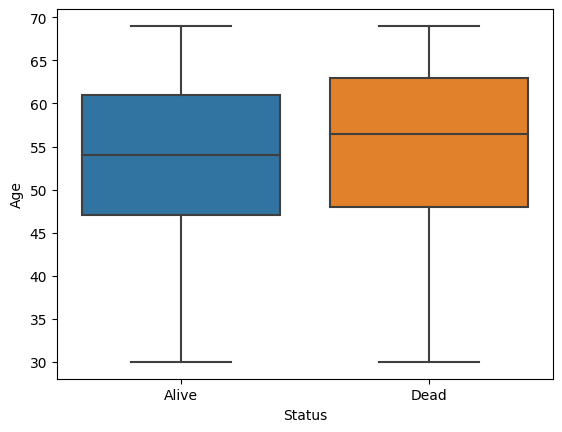

In [5]:
sns.boxplot(data=raw_df,x='Status',y='Age')

<Axes: xlabel='Status', ylabel='Age'>

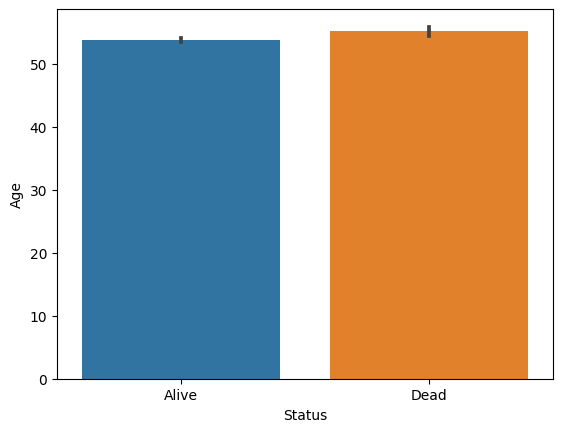

In [6]:
sns.barplot(data=raw_df,x='Status',y='Age')

<Axes: xlabel='Status', ylabel='Tumor Size'>

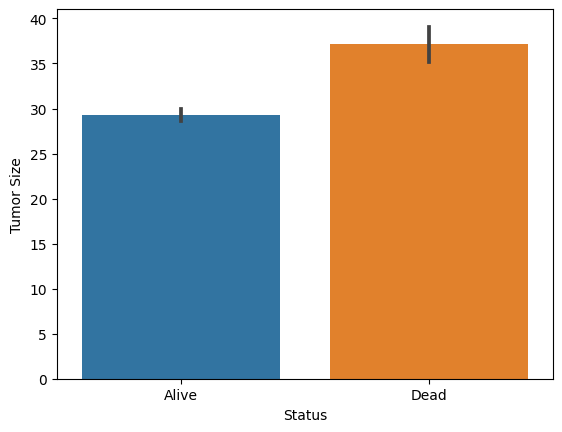

In [7]:
sns.barplot(data=raw_df,x='Status',y='Tumor Size')

In [8]:
list(raw_df.columns)

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

Creating Status_binary for XGB Classifier

In [9]:
raw_df['Status_binary'] = raw_df.Status.map({'Alive' : 1,'Dead': 0})

In [10]:
input_col = list(raw_df.columns)[:-1]
target_col = 'Status'
target_col_XGB = 'Status_binary'

In [11]:
input_col

['Age',
 'Race',
 'Marital Status',
 'T Stage ',
 'N Stage',
 '6th Stage',
 'differentiate',
 'Grade',
 'A Stage',
 'Tumor Size',
 'Estrogen Status',
 'Progesterone Status',
 'Regional Node Examined',
 'Reginol Node Positive',
 'Survival Months',
 'Status']

### Preprocessing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_df,test_df = train_test_split(raw_df,test_size=0.2,random_state=42)

In [14]:
train_df.shape,test_df.shape

((3219, 17), (805, 17))

In [15]:
train_input = train_df[input_col].copy()
train_target = train_df[target_col].copy()
train_target_XGB = train_df[target_col_XGB].copy()
test_input = test_df[input_col].copy()
test_target = test_df[target_col].copy()
test_target_XGB = test_df[target_col_XGB].copy()

In [16]:
len(train_input.columns)

16

In [17]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3219 entries, 2665 to 3174
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     3219 non-null   int64 
 1   Race                    3219 non-null   object
 2   Marital Status          3219 non-null   object
 3   T Stage                 3219 non-null   object
 4   N Stage                 3219 non-null   object
 5   6th Stage               3219 non-null   object
 6   differentiate           3219 non-null   object
 7   Grade                   3219 non-null   object
 8   A Stage                 3219 non-null   object
 9   Tumor Size              3219 non-null   int64 
 10  Estrogen Status         3219 non-null   object
 11  Progesterone Status     3219 non-null   object
 12  Regional Node Examined  3219 non-null   int64 
 13  Reginol Node Positive   3219 non-null   int64 
 14  Survival Months         3219 non-null   int64 
 15  Status

There is no NAN values in train_df and test_df

In [18]:
numeric_cols = ['Age','Tumor Size','Regional Node Examined','Reginol Node Positive','Survival Months']
categorical_cols = ['Race','Marital Status','N Stage','6th Stage','differentiate','Grade','A Stage','T Stage ','Estrogen Status','Progesterone Status']

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train_input[numeric_cols])

MinMaxScaler()

In [22]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])

In [23]:
train_input[numeric_cols].describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,0.611027,0.211033,0.221238,0.071644,0.661907
std,0.230781,0.149305,0.135205,0.115285,0.215753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.435897,0.107914,0.133333,0.000000,0.518868
50%,0.615385,0.172662,0.216667,0.022222,0.679245
75%,0.794872,0.266187,0.300000,0.088889,0.830189
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder = OneHotEncoder(sparse_output=False,handle_unknown='ignore').fit(train_input[categorical_cols])

In [26]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [27]:
train_input[encoded_cols] = encoder.transform(train_input[categorical_cols])


In [28]:
train_input[encoded_cols]= encoder.transform(train_input[categorical_cols])
test_input[encoded_cols]= encoder.transform(test_input[categorical_cols])

In [29]:
X_train = train_input[numeric_cols+encoded_cols]
X_test = test_input[numeric_cols+encoded_cols]

To try different Classifier models

In [30]:
def try_diff_models(model):
    model.fit(X_train,train_target)
    train_score = model.score(X_train,train_target)
    test_score = model.score(X_test,test_target)
    return train_score,test_score

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
from xgboost import XGBClassifier

### Using DecisionTreeClassifier

In [34]:
model_DTC = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30).fit(X_train,train_target)

In [35]:
train_preds_dtc = model_DTC.score(X_train,train_target)
test_preds_dtc = model_DTC.score(X_test,test_target)

In [36]:
print("Train Accuracy :",format(train_preds_dtc))
print("Test Accuracy :",format(test_preds_dtc))

Train Accuracy : 0.916744330537434
Test Accuracy : 0.9130434782608695


### Using RandomForestClassifier

In [37]:
model_rfc = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30).fit(X_train,train_target)

In [38]:
train_preds_rfc = model_rfc.score(X_train,train_target)
test_preds_rfc = model_rfc.score(X_test,test_target)

In [39]:
print("Train Accuracy :",format(train_preds_rfc))
print("Test Accuracy :",format(test_preds_rfc))

Train Accuracy : 0.9229574401988195
Test Accuracy : 0.915527950310559


### Using XGB Classifier

In [40]:
model_xgbc = XGBClassifier(n_jobs=-1,random_state=42).fit(X_train,train_target_XGB)

In [41]:
train_preds_xgbc = model_xgbc.score(X_train,train_target_XGB)
test_preds_xgbc = model_xgbc.score(X_test,test_target_XGB)

In [42]:
print("Train Accuracy :",format(train_preds_xgbc))
print("Test Accuracy :",format(test_preds_xgbc))

Train Accuracy : 0.9922336129232681
Test Accuracy : 0.9043478260869565
